In [20]:
text = "The sequel, Yes, Prime Minister, ran from 1986 to 1988. In total there were 38 episodes, of which all but one lasted half an hour. Almost all episodes ended with a variation of the title of the series spoken as the answer to a question posed by the same character, Jim Hacker. Several episodes were adapted for BBC Radio, and a stage play was produced in 2010, the latter leading to a new television series on UKTV Gold in 2013."

In [21]:
text

'The sequel, Yes, Prime Minister, ran from 1986 to 1988. In total there were 38 episodes, of which all but one lasted half an hour. Almost all episodes ended with a variation of the title of the series spoken as the answer to a question posed by the same character, Jim Hacker. Several episodes were adapted for BBC Radio, and a stage play was produced in 2010, the latter leading to a new television series on UKTV Gold in 2013.'

In [22]:
import spacy

In [30]:
nlp = spacy.load('en')

用nlp模型分析文本text，将结果命名为doc

In [ ]:
doc = nlp(text)

In [32]:
doc

The sequel, Yes, Prime Minister, ran from 1986 to 1988. In total there were 38 episodes, of which all but one lasted half an hour. Almost all episodes ended with a variation of the title of the series spoken as the answer to a question posed by the same character, Jim Hacker. Several episodes were adapted for BBC Radio, and a stage play was produced in 2010, the latter leading to a new television series on UKTV Gold in 2013.

好像跟刚才的text内容没有区别呀？不还是这段文本吗？别着急，Spacy只是为了让我们看着舒服，所以只打印出来文本内容。

其实，它在后台，已经对这段话进行了许多层次的分析。

不信？ 我们来试试，让Spacy帮我们分析这段话中出现的全部词例（token）。

In [37]:
for token in doc:
    print('"  ' + token.text + '  "')

"  The  "
"  sequel  "
"  ,  "
"  Yes  "
"  ,  "
"  Prime  "
"  Minister  "
"  ,  "
"  ran  "
"  from  "
"  1986  "
"  to  "
"  1988  "
"  .  "
"  In  "
"  total  "
"  there  "
"  were  "
"  38  "
"  episodes  "
"  ,  "
"  of  "
"  which  "
"  all  "
"  but  "
"  one  "
"  lasted  "
"  half  "
"  an  "
"  hour  "
"  .  "
"  Almost  "
"  all  "
"  episodes  "
"  ended  "
"  with  "
"  a  "
"  variation  "
"  of  "
"  the  "
"  title  "
"  of  "
"  the  "
"  series  "
"  spoken  "
"  as  "
"  the  "
"  answer  "
"  to  "
"  a  "
"  question  "
"  posed  "
"  by  "
"  the  "
"  same  "
"  character  "
"  ,  "
"  Jim  "
"  Hacker  "
"  .  "
"  Several  "
"  episodes  "
"  were  "
"  adapted  "
"  for  "
"  BBC  "
"  Radio  "
"  ,  "
"  and  "
"  a  "
"  stage  "
"  play  "
"  was  "
"  produced  "
"  in  "
"  2010  "
"  ,  "
"  the  "
"  latter  "
"  leading  "
"  to  "
"  a  "
"  new  "
"  television  "
"  series  "
"  on  "
"  UKTV  "
"  Gold  "
"  in  "
"  2013  "
"  .  "


# 1. 词性分析
**除了词例内容本身，Spacy还把每个词例的一些属性信息，进行了处理。**   
**下面，我们只对前10个词例（token），输出以下内容：**

- 文本
- 索引值（即在原文中的定位）
- 词元(lemma)
- 是否为标点符号
- 是否为空格
- 词性
- 标记

In [40]:
for token in doc[:10]:
    print("{0}\t\t{1}\t{2}\t{3}\t{4}\t{5}\t{6}\t{7}".format(
        token.text,
        token.idx,
        token.lemma_,
        token.is_punct,
        token.is_space,
        token.shape_,
        token.pos_,
        token.tag_
    ))

The		0	the	False	False	Xxx	DET	DT
sequel		4	sequel	False	False	xxxx	NOUN	NN
,		10	,	True	False	,	PUNCT	,
Yes		12	yes	False	False	Xxx	INTJ	UH
,		15	,	True	False	,	PUNCT	,
Prime		17	prime	False	False	Xxxxx	PROPN	NNP
Minister		23	minister	False	False	Xxxxx	PROPN	NNP
,		31	,	True	False	,	PUNCT	,
ran		33	run	False	False	xxx	VERB	VBD
from		37	from	False	False	xxxx	ADP	IN


    
---
# 2. 命名实体识别
**下面我们不再考虑全部词性，只关注文本中出现的实体（entity）词汇**


In [35]:
for ent in doc.ents:
    print(ent.text, ent.label_)

1986 to 1988 DATE
38 CARDINAL
one CARDINAL
half an hour TIME
Jim Hacker PERSON
BBC Radio ORG
2010 DATE
UKTV Gold ORG
2013 DATE


**在这一段文字中，出现的实体包括日期、时间、基数（Cardinal）……Spacy不仅自动识别出了Jim Hacker为人名，还正确判定BBC Radio和UKTV Gold为机构名称。**

如果你平时的工作，需要从海量评论里筛选潜在竞争产品或者竞争者，那看到这里，有没有一点儿灵感呢？

执行下面这段代码，看看会发生什么：

In [41]:
from spacy import displacy
displacy.render(doc, style='ent', jupyter=True)

**如上图所示，Spacy帮我们把实体识别的结果，进行了直观的可视化。不同类别的实体，还采用了不同的颜色加以区分。**

---
###  **把一段文字拆解为语句，对Spacy而言，也是小菜一碟。**

In [42]:
for sent in doc.sents:
    print(sent)

The sequel, Yes, Prime Minister, ran from 1986 to 1988.
In total there were 38 episodes, of which all but one lasted half an hour.
Almost all episodes ended with a variation of the title of the series spoken as the answer to a question posed by the same character, Jim Hacker.
Several episodes were adapted for BBC Radio, and a stage play was produced in 2010, the latter leading to a new television series on UKTV Gold in 2013.


---
**注意这里，doc.sents并不是个列表类型，而是一个生成器 generator **    
**所以，假设我们需要从中筛选出某一句话，需要先将其转化为列表。**

In [43]:
doc.sents

In [44]:
list(doc.sents)

[The sequel, Yes, Prime Minister, ran from 1986 to 1988.,
 In total there were 38 episodes, of which all but one lasted half an hour.,
 Almost all episodes ended with a variation of the title of the series spoken as the answer to a question posed by the same character, Jim Hacker.,
 Several episodes were adapted for BBC Radio, and a stage play was produced in 2010, the latter leading to a new television series on UKTV Gold in 2013.]

------
# 3. 语法 --- 依赖关系刻画

下面要展示的功能，分析范围局限在第一句话。

我们将其抽取出来，并且重新用nlp模型处理，存入到新的变量newdoc中。

In [48]:
newdoc = nlp(list(doc.sents)[0].text)

In [49]:
newdoc

The sequel, Yes, Prime Minister, ran from 1986 to 1988.

**对这一句话，我们想要搞清其中每一个词例（token）之间的依赖关系。**

In [51]:
for token in newdoc:
    print("{0}({1}) <--{2}-- {3}({4})".format(
        token.text, token.tag_, token.dep_, token.head.text, token.head.tag_))

The(DT) <--det-- sequel(NN)
sequel(NN) <--nsubj-- ran(VBD)
,(,) <--punct-- sequel(NN)
Yes(UH) <--intj-- sequel(NN)
,(,) <--punct-- sequel(NN)
Prime(NNP) <--compound-- Minister(NNP)
Minister(NNP) <--appos-- sequel(NN)
,(,) <--punct-- sequel(NN)
ran(VBD) <--ROOT-- ran(VBD)
from(IN) <--prep-- ran(VBD)
1986(CD) <--pobj-- from(IN)
to(IN) <--prep-- from(IN)
1988(CD) <--pobj-- to(IN)
.(.) <--punct-- ran(VBD)


### 词性依赖关系可视化
**很清晰，但是列表的方式，似乎不大直观。那就让Spacy帮我们可视化吧。**

In [52]:
displacy.render(newdoc, style='dep', jupyter=True, options={'distance': 90})

### 分析：
这些依赖关系链接上的词汇，都代表什么？

如果你对语言学比较了解，应该能看懂。

不懂？查查字典嘛。

跟语法书对比一下，看看Spacy分析得是否准确。

前面我们分析的，属于语法层级。

---

# 4. 语义 --- 词向量的近似度计算

下面我们看语义。

我们利用的工具，叫做词嵌入（word embedding）模型。
   
   
例如给你下面这个式子：

** ? - woman = king - queen**

只要你学过英语，就不难猜到这里大概率应该填写“**man**”。

但是，如果你只是用了随机的序号来代表词汇，又如何能够猜到这里正确的填词结果呢？

幸好，在深度学习领域，我们可以使用更为顺手的单词向量化工具——**词嵌入（word embeddings ）**。
   
###  使用词嵌入模型，我们需要Spacy读取一个新的文件。

In [60]:
nlp = spacy.load('en_core_web_lg')
nlp.vocab['minister'].vector   # 打印“minister”这个单词对应的向量取值。可以看到，每个单词，用总长度为300的浮点数组成向量来表示。

array([-3.2239e-01,  3.8982e-01,  6.4522e-01,  8.7596e-02,  4.0262e-01,
       -4.1253e-01,  1.3804e-01, -4.0226e-01, -3.0679e-01,  3.6520e+00,
       -6.1745e-01, -2.4114e-01,  1.7488e-01, -2.5995e-01, -3.8512e-01,
       -1.3747e-01, -3.7446e-01, -8.0867e-01,  2.8081e-01,  2.9735e-01,
        1.7901e-01, -3.4726e-02,  7.2466e-02, -5.2111e-01,  7.1858e-02,
        1.5913e-01, -6.0877e-01,  1.6604e-01, -9.3809e-02,  2.0030e-01,
       -5.0653e-01, -1.4978e-01,  1.7742e-01,  3.2996e-02, -2.1082e-01,
       -6.0442e-02, -9.6639e-02, -4.6054e-01, -7.1622e-02, -1.4829e-01,
        5.1362e-01, -3.7840e-01, -3.2035e-01, -1.1593e-01, -1.5887e-01,
        2.5999e-01,  2.6821e-01,  2.7429e-01, -5.8973e-02, -1.0218e-01,
        6.6629e-03,  3.5737e-01,  3.1083e-01,  4.7950e-01,  4.4323e-01,
        8.0089e-03,  6.4577e-02, -4.1851e-01,  3.2589e-01, -6.0894e-01,
       -3.5944e-01,  1.9116e-01,  1.5910e-02, -1.8912e-01,  1.2646e-01,
       -9.6918e-03, -6.5529e-01, -4.1851e-01,  4.0244e-01, -6.72

Spacy读入的这个模型，是采用**word2vec**，在海量语料上训练的结果。


我们来看看，此时Spacy的**语义近似度**判别能力。

这里，我们将4个变量，赋值为对应单词的向量表达结果。

In [61]:
dog = nlp.vocab["dog"]
cat = nlp.vocab["cat"]
apple = nlp.vocab["apple"]
orange = nlp.vocab["orange"]

In [62]:
dog.similarity(cat)  # 都是宠物，近似度高，可以接受

0.80168545

In [63]:
dog.similarity(apple)  # 一个动物，一个水果，近似度一下子就跌落下来了

0.26339024

In [64]:
dog.similarity(orange)  # 相似度也不高

0.2742508

In [65]:
apple.similarity(orange)  # 水果间近似度，远远超过水果与动物的相似程度

0.56189173

测试通过。

看来Spacy利用词嵌入模型，对语义有了一定的理解。

---

下面为了好玩，我们来考考它。

这里，我们需要计算词典中可能不存在的向量，因此Spacy自带的**similarity()函数**，就显得不够用了。

我们从scipy中，找到相似度计算需要用到的**余弦函数**。

In [66]:
from scipy.spatial.distance import cosine

对比一下，我们直接代入“狗”和“猫”的向量，进行计算

In [67]:
1 - cosine(dog.vector, cat.vector)

0.8016855098942641

In [ ]:
除了保留数字外，计算结果与Spacy自带的similarity()运行结果没有差别。

我们把它做成一个小函数，专门处理向量输入。

In [81]:
def vector_similarity(x, y):
    return 1 - cosine(x, y)

In [82]:
vector_similarity(dog.vector, apple.vector)   # 测试一下“狗”和“苹果”

0.26339025559276397

与刚才的结果对比，也是一致的。

---
# 重点来了：  ? - woman = king - queen 
   
我们把问号，称为 **guess_word** 

In [83]:
def make_guess_word(words):
    [first, second, third] = words
    return nlp.vocab[first].vector - nlp.vocab[second].vector + nlp.vocab[third].vector

#### 下面的函数就比较暴力了，它其实是用我们计算的 guess_word 取值，和字典中全部词语一一核对近似性。把最为近似的10个候选单词打印出来。

In [71]:
def get_similar_word(words, scope=nlp.vocab):
    
    guess_word = make_guess_word(words)

    similarities = []

    for word in scope:
        if not word.has_vector:
            continue

        similarity = vector_similarity(guess_word, word.vector)
        similarities.append((word, similarity))


    similarities = sorted(similarities, key=lambda item: -item[1])
    print([word[0].text for word in similarities[:10]])

In [85]:
words = ["king", "queen", "woman"]
get_similar_word(words)

['MAN', 'Man', 'mAn', 'MAn', 'MaN', 'man', 'mAN', 'WOMAN', 'womAn', 'WOman']


原来字典里面，“男人”(man)这个词汇有这么多的变形啊。

---
但是这个例子太经典了，我们尝试个新鲜一些的：
###   ? - England = Paris - London
    
左侧国别，右侧首都，对应来看，自然是巴黎所在的法国（France）。

问题是，Spacy能猜对吗？

In [75]:
words = ["Paris", "London", "England"]
get_similar_word(words)

['france', 'FRANCE', 'France', 'Paris', 'paris', 'PARIS', 'EUROPE', 'EUrope', 'europe', 'Europe']


结果很令人振奋，前三个都是“法国”（France）。

--- 

# 5. 词向量降维和可视化
下面我们做一个更有趣的事儿，把词向量的300维的高空间维度，压缩到一张纸（二维）上，看看词语之间的相对位置关系。

In [104]:
import numpy as np
embedding = np.array([])  # 把词嵌入矩阵先设定为空。一会儿慢慢填入。
word_list = []            # 需要演示的单词列表，也先空着。

再次让Spacy遍历“Yes, Minister”维基页面中摘取的那段文字，加入到单词列表中。注意这次我们要进行判断：

- 如果是标点，丢弃；
- 如果词汇已经在词语列表中，丢弃。

In [105]:
for token in doc:
    if not(token.is_punct) and not(token.text in word_list):
        word_list.append(token.text)

In [106]:
word_list

['The',
 'sequel',
 'Yes',
 'Prime',
 'Minister',
 'ran',
 'from',
 '1986',
 'to',
 '1988',
 'In',
 'total',
 'there',
 'were',
 '38',
 'episodes',
 'of',
 'which',
 'all',
 'but',
 'one',
 'lasted',
 'half',
 'an',
 'hour',
 'Almost',
 'ended',
 'with',
 'a',
 'variation',
 'the',
 'title',
 'series',
 'spoken',
 'as',
 'answer',
 'question',
 'posed',
 'by',
 'same',
 'character',
 'Jim',
 'Hacker',
 'Several',
 'adapted',
 'for',
 'BBC',
 'Radio',
 'and',
 'stage',
 'play',
 'was',
 'produced',
 'in',
 '2010',
 'latter',
 'leading',
 'new',
 'television',
 'on',
 'UKTV',
 'Gold',
 '2013']

检查了一下，一长串（63个）词语列表中，没有出现标点。一切正常。

下面，我们把每个词汇对应的空间向量，追加到词嵌入矩阵中。

In [107]:
for word in word_list:
    embedding = np.append(embedding, nlp.vocab[word].vector)
embedding.shape

(18900,)

可以看到，所有的向量内容，都被放在了一个长串上面。这显然不符合我们的要求，我们将不同的单词对应的词向量，拆解到不同行上面去。

In [108]:
embedding = embedding.reshape(len(word_list), -1)  # 将不同的单词对应的词向量，拆解到不同行上面去
embedding.shape    # 变换后词嵌入矩阵的维度

(63, 300)

63个词汇，每个为长度300的向量，这就对了。

---

In [110]:
from sklearn.manifold import TSNE # 读入TSNE模块
tsne = TSNE()   # tsne的作用，是把高维度的词向量（300维）压缩到二维平面上。我们执行这个转换过程：

low_dim_embedding = tsne.fit_transform(embedding)

In [112]:
import matplotlib.pyplot as plt    # 用matplotlib 将二维降维后的词向量们画出来
%pylab inline   

Populating the interactive namespace from numpy and matplotlib


C:\Users\Yemon\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['text']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [113]:
def plot_with_labels(low_dim_embs, labels, filename='tsne.pdf'):
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    plt.figure(figsize=(18, 18))  # in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i, :]
        plt.scatter(x, y)
        plt.annotate(label,
                 xy=(x, y),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
    plt.savefig(filename)

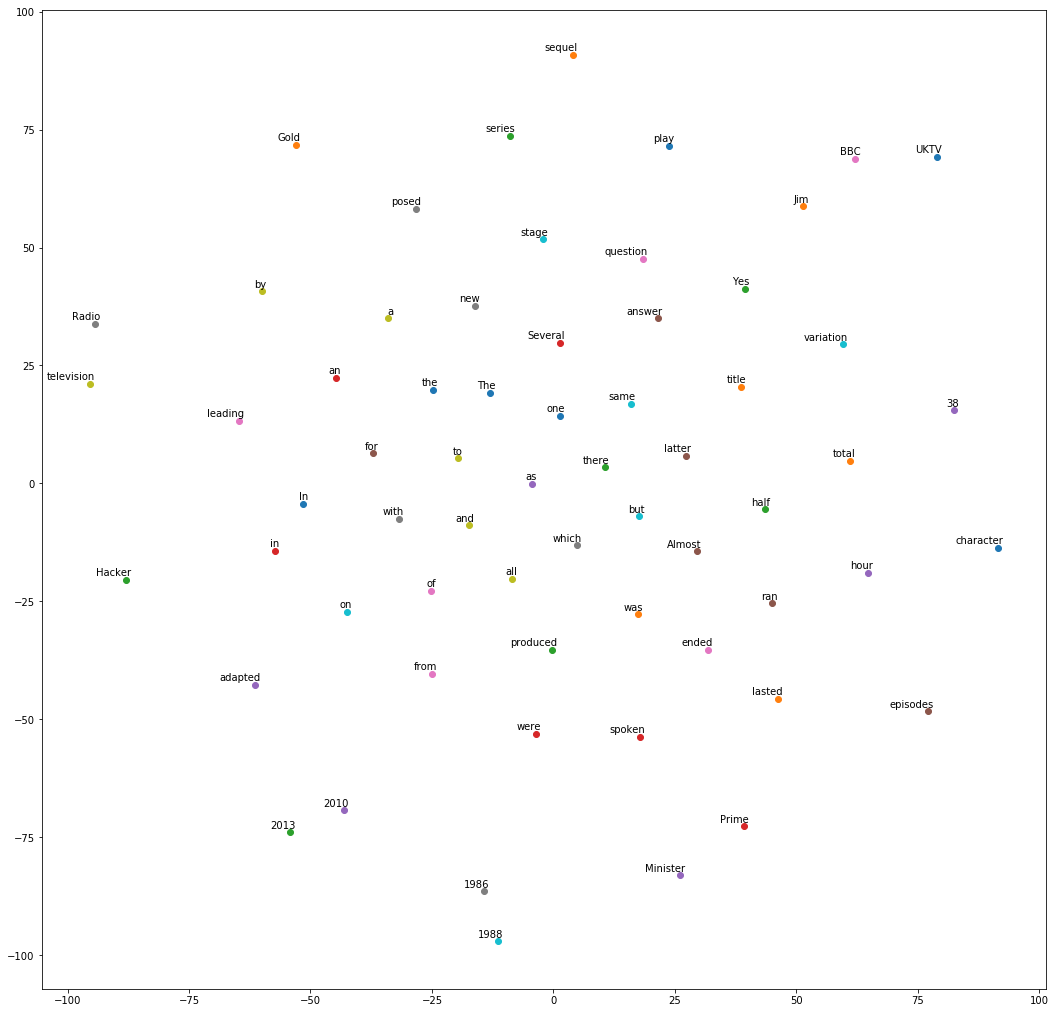

In [114]:
plot_with_labels(low_dim_embedding, word_list)

请注意观察图中的几个部分：

年份

同一单词的大小写形式

Radio 和 television

a 和 an

看看有什么规律没有？

我发现了一个有意思的现象——每次运行tsne，产生的二维可视化图都不一样！

不过这也正常，因为这段话之中出现的单词，并非都有预先训练好的向量。

这样的单词，被Spacy进行了随机化等处理。

因此，每一次生成高维向量，结果都不同。不同的高维向量，压缩到二维，结果自然也会有区别。

问题来了，如果我希望每次运行的结果都一致，该如何处理呢？

这个问题，作为课后思考题，留给你自行解答。

细心的你可能发现了，执行完最后一条语句后，页面左侧边栏文件列表中，出现了一个新的pdf文件。